# Linear Regression


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## 3. Nonlinear

$$f(x) = \sin(3.2x) + 0.8x$$


### 3. 生成假資料

In [2]:
x = np.linspace(0, 5, 100)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(100)

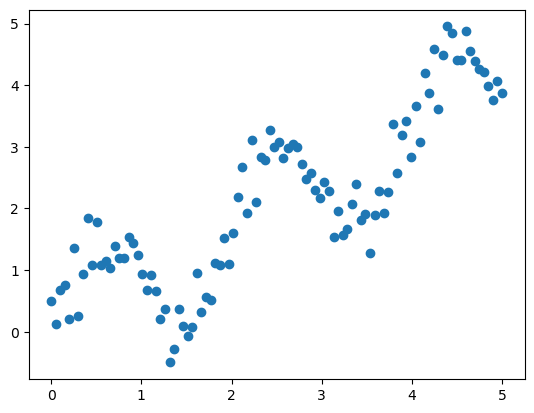

In [3]:
plt.scatter(x,y)

#### nonlinear

In [4]:
regr_lin = LinearRegression()

In [5]:
X = x.reshape(-1, 1)
print(X.shape)

(100, 1)


In [6]:
regr_lin.fit(X,y)

LinearRegression()

0.5805074684112379


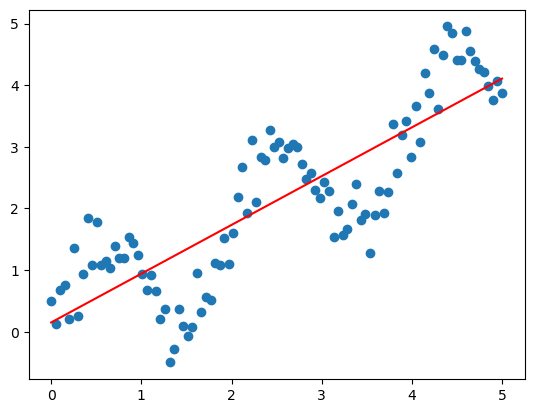

In [7]:
Y=regr_lin.predict(X)
plt.scatter(x,y)
plt.plot(x,Y , color='r')
mse = np.sum((Y-y)**2) / len(y)
print(mse)

果然超級不準, 該如何是好?

#### 多項式

多項式5次方

$$\widehat{y}=xw+b=w_{1}x_{1}+w_{2}x_{1}^{2}+w_{3}x_{1}^{3}+w_{4}x_{1}^{4}+w_{5}x_{1}^{5}+b$$

In [8]:
print(x.shape)

(100,)


In [9]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5] for k in x])  # add k**6 to try it
print(X_poly.shape)

(100, 5)


In [10]:
regr_poly = LinearRegression()

In [11]:
regr_poly.fit(X_poly, y)

LinearRegression()

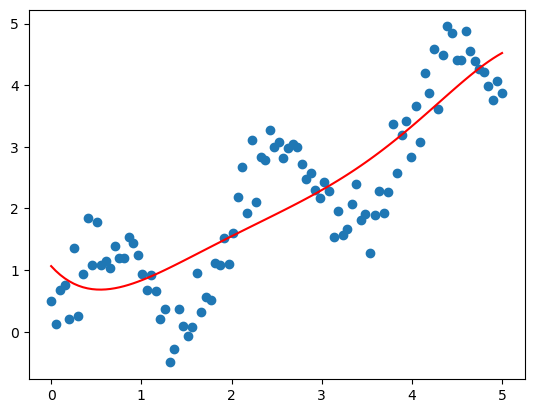

In [12]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

In [13]:
print('Coefficients: ', regr_poly.coef_)
print('interception: ', regr_poly.intercept_)

Coefficients:  [-1.61344883  2.11446926 -0.8983695   0.17842459 -0.01297838]
interception:  1.0653428856280454


In [14]:
W=regr_poly.coef_
b=regr_poly.intercept_
np.dot(X_poly,W.T)+b

array([1.06534289, 0.9891345 , 0.92303484, 0.86639067, 0.81857556,
       0.77898944, 0.74705804, 0.72223239, 0.70398831, 0.6918259 ,
       0.68526904, 0.68386484, 0.68718319, 0.69481617, 0.70637762,
       0.72150256, 0.73984672, 0.76108601, 0.78491601, 0.81105148,
       0.8392258 , 0.86919052, 0.90071479, 0.93358489, 0.9676037 ,
       1.00259017, 1.03837887, 1.07481939, 1.11177593, 1.14912667,
       1.18676338, 1.22459082, 1.26252626, 1.30049897, 1.33844971,
       1.37633021, 1.41410265, 1.45173918, 1.48922137, 1.52653972,
       1.56369316, 1.6006885 , 1.63753996, 1.67426861, 1.71090193,
       1.74747322, 1.78402114, 1.82058917, 1.85722513, 1.89398062,
       1.93091056, 1.96807266, 2.00552687, 2.04333492, 2.08155981,
       2.12026525, 2.15951518, 2.19937326, 2.23990235, 2.28116401,
       2.32321796, 2.3661216 , 2.40992948, 2.4546928 , 2.50045889,
       2.54727069, 2.59516626, 2.64417826, 2.69433341, 2.74565204,
       2.7981475 , 2.85182572, 2.90668466, 2.9627138 , 3.01989

In [15]:
regr_poly.predict(X_poly)

array([1.06534289, 0.9891345 , 0.92303484, 0.86639067, 0.81857556,
       0.77898944, 0.74705804, 0.72223239, 0.70398831, 0.6918259 ,
       0.68526904, 0.68386484, 0.68718319, 0.69481617, 0.70637762,
       0.72150256, 0.73984672, 0.76108601, 0.78491601, 0.81105148,
       0.8392258 , 0.86919052, 0.90071479, 0.93358489, 0.9676037 ,
       1.00259017, 1.03837887, 1.07481939, 1.11177593, 1.14912667,
       1.18676338, 1.22459082, 1.26252626, 1.30049897, 1.33844971,
       1.37633021, 1.41410265, 1.45173918, 1.48922137, 1.52653972,
       1.56369316, 1.6006885 , 1.63753996, 1.67426861, 1.71090193,
       1.74747322, 1.78402114, 1.82058917, 1.85722513, 1.89398062,
       1.93091056, 1.96807266, 2.00552687, 2.04333492, 2.08155981,
       2.12026525, 2.15951518, 2.19937326, 2.23990235, 2.28116401,
       2.32321796, 2.3661216 , 2.40992948, 2.4546928 , 2.50045889,
       2.54727069, 2.59516626, 2.64417826, 2.69433341, 2.74565204,
       2.7981475 , 2.85182572, 2.90668466, 2.9627138 , 3.01989

#### RBF

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [16]:
# normal distrubution
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [17]:
sigma = 0.3

In [18]:
X_rbf = np.array([[RBF(k, .5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])



In [19]:
regr_rbf = LinearRegression()

In [20]:
regr_rbf.fit(X_rbf, y)

LinearRegression()

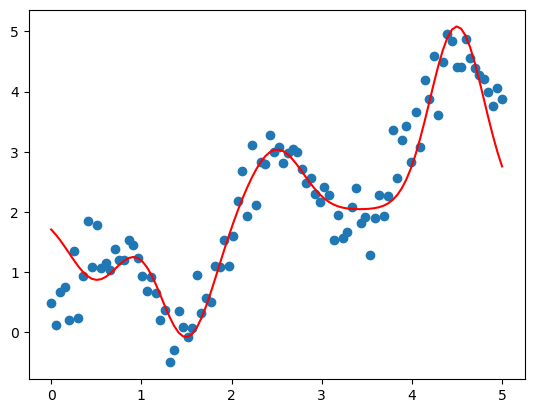

In [23]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

In [24]:
print('Coefficients: ', regr_rbf.coef_)
print('interception: ', regr_rbf.intercept_)

Coefficients:  [-1.10437941 -2.06264518  1.05898093  0.04917721  3.09525182]
interception:  1.986057167294004


#### Comparison

In [25]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

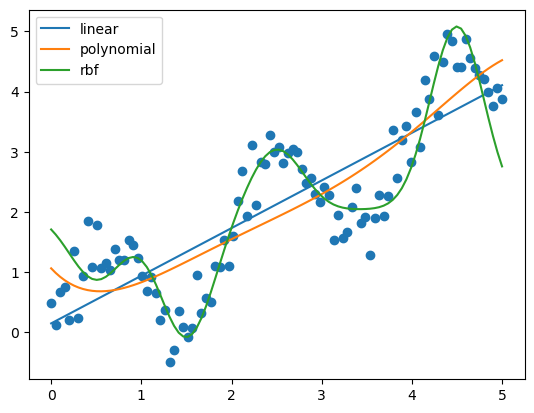

In [26]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()

## 請計算模型的MSE

In [27]:
print(np.sum((regr_lin.predict(X)-y)**2) / len(y))

0.5805074684112379


In [28]:
print(np.sum((regr_poly.predict(X_poly)-y)**2) / len(y))

0.5142595190547999


In [29]:
print(np.sum((regr_rbf.predict(X_rbf)-y)**2) / len(y))

0.23071959932850505
